### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course Docker environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Check Python version

In [ ]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Docker environment, or alternatively in the provided Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [ ]:
import os
nb_dirname = os.path.abspath('')
assert nb_dirname != '/notebooks', \
    '[ERROR] The notebook server appears to have been started at the same directory as the assignment. Make sure to start it at least one level above.'
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Run the following cells to verify that your notebook is up-to-date and not corrupted in any way

In [ ]:
%%javascript
IPython.notebook.kernel.execute(`nb_fname = '${IPython.notebook.notebook_name}'`);

In [ ]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

### Fill in group number and member names:

In [ ]:
GROUP = "A"
NAME1 = "Xiaofeng Wang"
NAME2 = ""

# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset, but on a new and very interesting dataset. We'll use the [Predict'em All](https://www.kaggle.com/semioniy/predictemall) dataset from Kaggle (download the dataset directly from them). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), having coordinates, time, weather, population density, distance to pokestops/ gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to ping-pong must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [1]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import nn
from torch import optim
from torch.utils.data import random_split
from sklearn.metrics import confusion_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## 1. Loading and extracting subset

Load the `'300k.csv'` file using pandas.

In [2]:
# YOUR CODE HERE
data = pd.read_csv('300k.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [3]:
# YOUR CODE HERE
df = pd.DataFrame(data, columns=['latitude', 'longitude', 'class'])

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [4]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [5]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [6]:
# YOUR CODE HERE
Diglett = df['class']==name_dict['Diglett'] 
Seel = df['class']==name_dict['Seel']  
Tauros = df['class']==name_dict['Tauros']
pokemon_data = pd.concat([df[(Diglett)], df[(Seel)], df[(Tauros)]])

## 2. Visualization of the dataset

Plot a histogram of the number of occurrences of each class.

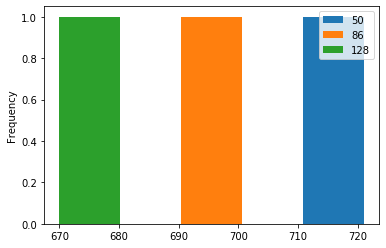

In [7]:
# YOUR CODE HERE
k = {}
class_names = pokemon_data['class'].unique()
for name in class_names:
    result = pokemon_data['class']==name
    k[name] = len(pokemon_data[result])

g = pd.DataFrame(k, index=[0])
g.plot(kind='hist', bins=5);

Is the dataset balanced?

**Your answer:** (fill in here)<br>
I think our dataset is balanced since each class has almost the same number of data samples (as can be seen from the chart above).

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

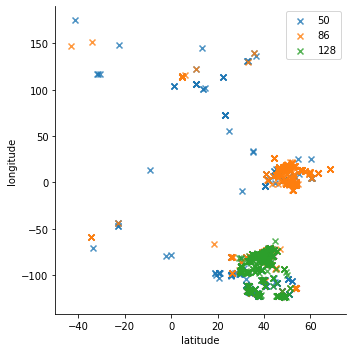

In [8]:
# YOUR CODE HERE
sns.lmplot( x="latitude", y="longitude", data=pokemon_data, fit_reg=False, hue='class', legend=False, markers=["x", "x", "x"])
plt.legend(loc='best')

Is there any other visualization you think would be useful? If so, insert it here.

**Your answer:** (fill in here)

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** (fill in here)<br>
From the 2D figure above, I think the problem would be hard to solve. There is an area which is covered by all three classes. Except this area, there is another area which is covered by the red dots (representing Diglett) and the green dots (representing Seel). Worse, the red dots are mostly concentrated around 2 big area (that are quite separated from one another), so I think we need to use some non-linearity methods in the solution to get a good accuracy. Additionally, we can find the blue and the green dots seem to be much better separated.

Which accuracy do you expect to achieve?

**Your answer:** (fill in here)<br>
The probability of getting the right class when we pick a class randomly is 1/3 (since the classes are very balanced). We would get the same accuracy if all the 3 pokemons are spread equally well around the world. However, in this question, we can separate the blue and the green dots well (while the red dots cannot). Assuming that we can predict correctly the blue and green dots, and randomly for the red dots, then the probability of picking the right class is around 1/2. In conclusion, the accuracy will be higher than 50% using a good model. 

## 3. Preprocessing

Prepare input and output vectors.

In [9]:
# YOUR CODE HERE
x = pokemon_data[['latitude', 'longitude']].values

def pokemon_class(class_name):
    if class_name == 50:
        return 0
    if class_name == 86:
        return 1
    if class_name == 128:
        return 2
    else:
        raise ValueError('Class \'{}\' is not recognized.'.format(class_name))
        
pokemon_list = map(pokemon_class, pokemon_data['class'].values)
y = np.array(list(pokemon_list))

Separate your data into training and test sets. 20% of the data should be in the test set.

In [10]:
# YOUR CODE HERE
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

## 4. Training

Choose an architecture for your network.

In [11]:
# YOUR CODE HERE
train_x = torch.tensor(xtrain, dtype=torch.float32)
train_y = torch.tensor(ytrain)
ourdata = TensorDataset(train_x, train_y)
data_loader = DataLoader(ourdata, batch_size=32, shuffle=True)

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Sequential(nn.Linear(2, 30), nn.ReLU(), nn.Linear(30, 20), nn.ReLU(), nn.Linear(20, 15), nn.ReLU(), nn.Linear(15, 3))        
        
    def forward(self, b):
        return self.lin(b)
    
Model = LogisticRegression()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(Model.parameters(), lr=0.001)

Train the network. When training, separate 30% of your training data into a validation set.

In [12]:
# YOUR CODE HERE
val_size = int(30 * len(ourdata)/100)
train_size = len(ourdata) - val_size
train_data, val_data = random_split(ourdata, [train_size, val_size])

train_data_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_data_loader = DataLoader(val_data, batch_size=1)


for epoch in range(20):
    losses = []
    n_correct = 0
    
    for b_x, b_y in train_data_loader:
        pred = Model(b_x)
        by = b_y.long()
        
        loss = loss_fn(pred, by)
        losses.append(loss.item())
        
        hard_preds = pred.argmax(dim=1)
        n_correct += (pred.argmax(dim=1) == by).sum().item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_acc = n_correct/len(train_data)
    train_loss = sum(losses)/len(losses)    

        
    # Compute predictions in the validation set (with adagrad deactivated)
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            pred = Model(b_x)
            b_y = b_y.long()
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += (pred.argmax(dim=1) == b_y).sum().item()
        val_acc = n_correct/len(val_data)
        val_loss = sum(losses)/len(losses)      
        
        
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_loss, val_loss, train_acc, val_acc))

Epoch 0 	Loss: 0.925 	Loss (val): 0.861	Accuracy: 0.47 	Accuracy (val): 0.56
Epoch 1 	Loss: 0.843 	Loss (val): 0.810	Accuracy: 0.63 	Accuracy (val): 0.63
Epoch 2 	Loss: 0.817 	Loss (val): 0.790	Accuracy: 0.64 	Accuracy (val): 0.65
Epoch 3 	Loss: 0.789 	Loss (val): 0.798	Accuracy: 0.64 	Accuracy (val): 0.67
Epoch 4 	Loss: 0.802 	Loss (val): 0.788	Accuracy: 0.65 	Accuracy (val): 0.66
Epoch 5 	Loss: 0.797 	Loss (val): 0.816	Accuracy: 0.64 	Accuracy (val): 0.64
Epoch 6 	Loss: 0.772 	Loss (val): 0.775	Accuracy: 0.63 	Accuracy (val): 0.63
Epoch 7 	Loss: 0.775 	Loss (val): 0.780	Accuracy: 0.64 	Accuracy (val): 0.64
Epoch 8 	Loss: 0.762 	Loss (val): 0.776	Accuracy: 0.65 	Accuracy (val): 0.63
Epoch 9 	Loss: 0.767 	Loss (val): 0.774	Accuracy: 0.64 	Accuracy (val): 0.63
Epoch 10 	Loss: 0.771 	Loss (val): 0.776	Accuracy: 0.65 	Accuracy (val): 0.63
Epoch 11 	Loss: 0.784 	Loss (val): 0.790	Accuracy: 0.66 	Accuracy (val): 0.64
Epoch 12 	Loss: 0.775 	Loss (val): 0.805	Accuracy: 0.65 	Accuracy (val): 0

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [13]:
# YOUR CODE HERE
x_test = torch.tensor(xtest, dtype=torch.float32)
y_test = torch.tensor(ytest)

preds = Model(x_test).argmax(dim=1)

acc = (preds.long() == y_test.long()).sum().item()/len(preds.long())
print("Accuracy: %.2f" % acc)

Accuracy: 0.63


Compute the confusion matrix of your predictions on the test set.

In [14]:
# YOUR CODE HERE
confusion_matrix(y_test, preds)

array([[76, 30, 34],
       [12, 89, 41],
       [39,  0, 96]])

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** (fill in here)<br>
Not just accuracy, we can get more information from confusion matrix. 

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** (fill in here)<br>
First I will make a list of longitudes and latitudes of all the places that I can travel to (if I can travel to any places in the world, then this list is simply just a grid of longitudes and latitudes). Then I would use the model that I've made above to predict on this list of places. The prediction results will only contain the one pokemon that I want to catch.

Is(are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** (fill in here)<br>
I cannot say beforehand which features might be useful to be inclouded in the neural network. The best way to see which feature may be important is to plot the histograms as shown below. After checking each feature one by one, I thought "pressure" seems to be better than others.

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

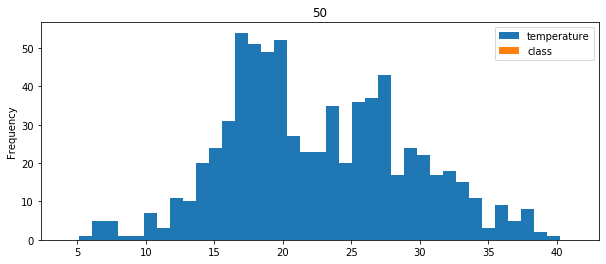

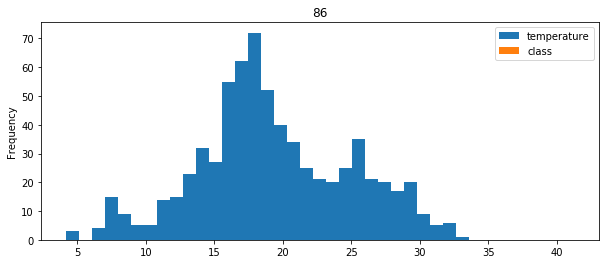

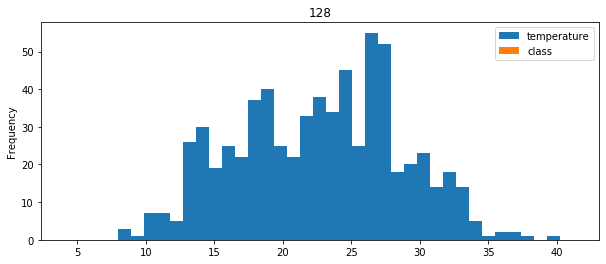

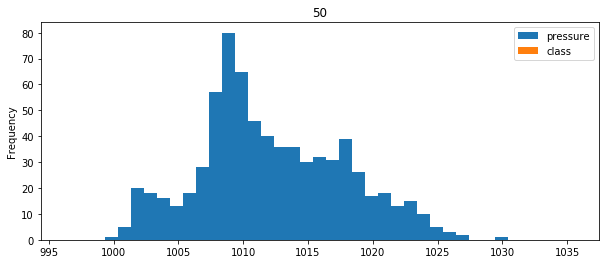

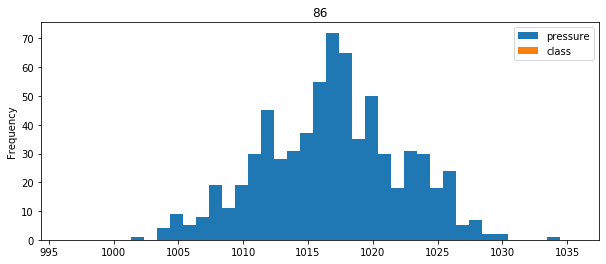

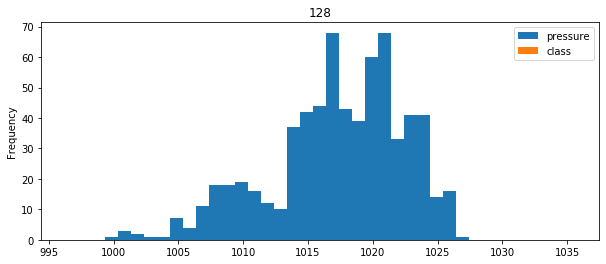

In [15]:
# YOUR CODE HERE
class_names = pokemon_data["class"].unique()

# temperature
df1 = pd.DataFrame(data, columns=['temperature', 'class'])
feature = df1.drop('class', axis=1)

# Find maximum and minimum values
max_val = np.max(feature.values)
min_val = np.min(feature.values)

# Create 40 linearly spaced numbers in this range
binsize = np.linspace(min_val, max_val, 40)

for name in class_names:
    df1[df1["class"]==name].plot(kind="hist", bins=binsize, figsize=[10,4], title=name);

# pressure
df2 = pd.DataFrame(data, columns=['pressure', 'class'])
feature2 = df2.drop('class', axis=1)

# Find maximum and minimum values
max_val2 = np.max(feature2.values)
min_val2 = np.min(feature2.values)

# Create 40 linearly spaced numbers in this range
bin_size = np.linspace(min_val2, max_val2, 40)
#print(my_bins)

for name in class_names:
    df2[df2["class"]==name].plot(kind="hist", bins=bin_size, figsize=[10,4], title=name);

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer:** (fill in here)<br>
The purpose of these plots is to see which feature can distinguish among the 3 pokemons. For temperature, Diglett (50) and Seel (86) have almost the same spike value, but Tauros (128) has a different spike value. For pressure, all these pokemons exist in different atmospheric pressure. I suppose using these two features would probably help to predict pokemon since each class has almost different histogram from the other classes under these two features.

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [ ]:
# YOUR CODE HERE